In [176]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Function to get files in the location

import os
for dirname, _, filenames in os.walk('C:/Users/Sameer Thakare/titanic/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/Users/Sameer Thakare/titanic/titanic\gender_submission.csv
C:/Users/Sameer Thakare/titanic/titanic\test.csv
C:/Users/Sameer Thakare/titanic/titanic\train.csv


In [177]:
# Load the titanic data

train_data = pd.read_csv("C:/Users/Sameer Thakare/titanic/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [179]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [180]:
# Load test data

test_data = pd.read_csv("C:/Users/Sameer Thakare/titanic/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [181]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [182]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [183]:
# A simple way to split data is using sklearn

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=42)


In [184]:
'''
# stratified splitting

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(train_data):
    strat_train_set = train_data.loc[train_index]
    strat_test_set = train_data.loc[test_index]
'''

'\n# stratified splitting\n\nfrom sklearn.model_selection import StratifiedShuffleSplit\n\nsplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)\n\nfor train_index, test_index in split.split(train_data):\n    strat_train_set = train_data.loc[train_index]\n    strat_test_set = train_data.loc[test_index]\n'

In [185]:
# put the test set aside and you are only exploring the training set

titanic = train_set.copy()

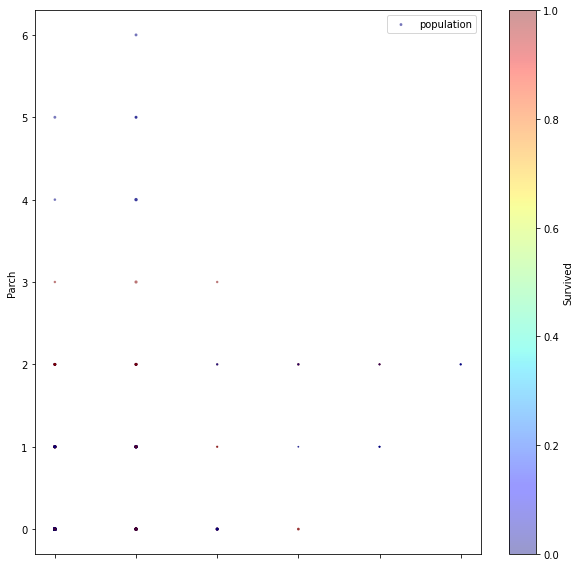

In [186]:
# Visualizing the data
import matplotlib.pyplot as plt

titanic.plot(kind="scatter", x="SibSp", y="Parch", alpha=0.4,
 s=titanic["Age"]/10, label="population",
 c="Survived", cmap=plt.get_cmap("jet"), colorbar=True,figsize=(10,10)
)
plt.legend()
 

In [187]:
# Looking for Correlations

features = ["Pclass", "Sex", "SibSp", "Parch", "Survived", "Age", "Fare", "Embarked"]
X = pd.get_dummies(titanic[features])
corr_matrix = X.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived      1.000000
Sex_female    0.541750
Fare          0.246641
Embarked_C    0.159632
Parch         0.078311
Embarked_Q   -0.006097
SibSp        -0.047602
Age          -0.059695
Embarked_S   -0.142371
Pclass       -0.321750
Sex_male     -0.541750
Name: Survived, dtype: float64

In [188]:
#X["total_family"] = X["SibSp"] + X["Parch"]
X["value"] = X["Fare"]/X["Pclass"]
corr_matrix = X.corr()
corr_matrix["Survived"].sort_values(ascending = False)

Survived      1.000000
Sex_female    0.541750
value         0.256409
Fare          0.246641
Embarked_C    0.159632
Parch         0.078311
Embarked_Q   -0.006097
SibSp        -0.047602
Age          -0.059695
Embarked_S   -0.142371
Pclass       -0.321750
Sex_male     -0.541750
Name: Survived, dtype: float64

In [107]:
# Data Cleaning
# Set the missing values to some value (zero, the mean, the median, etc.)

# to find median 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [111]:
titanic = X.drop("Survived", axis =1)
titanic_labels = X["Survived"].copy()

In [125]:
titanic

,Pclass,SibSp,Parch,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,total_family,value
331,1,0,0,45.5,28.5000,0,1,0,0,1,0,28.500000
733,2,0,0,23.0,13.0000,0,1,0,0,1,0,6.500000
382,3,0,0,32.0,7.9250,0,1,0,0,1,0,2.641667
704,3,1,0,26.0,7.8542,0,1,0,0,1,1,2.618067
813,3,4,2,6.0,31.2750,1,0,0,0,1,6,10.425000
...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,0,0,21.0,7.6500,1,0,0,0,1,0,2.550000
270,1,0,0,NaN,31.0000,0,1,0,0,1,0,31.000000
860,3,2,0,41.0,14.1083,0,1,0,0,1,2,4.702767
435,1,1,2,14.0,120.0000,1,0,0,0,1,3,120.000000


In [114]:
# fit the imputer instance to the training data using the fit() method:
imputer.fit(titanic)

SimpleImputer()

In [115]:
imputer.statistics_

array([ 2.33005618,  0.55337079,  0.37921348, 29.49884615, 32.58627612,
        0.34410112,  0.65589888,  0.1755618 ,  0.08426966,  0.73735955,
        0.93258427, 25.21146393])

In [116]:
titanic.median().values

array([ 3.    ,  0.    ,  0.    , 28.    , 14.4542,  0.    ,  1.    ,
        0.    ,  0.    ,  1.    ,  0.    ,  6.2625])

In [123]:
X = imputer.transform(titanic)
titanic_tr = pd.DataFrame(X, columns=titanic.columns)

In [124]:
titanic_tr.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        712 non-null    float64
 1   SibSp         712 non-null    float64
 2   Parch         712 non-null    float64
 3   Age           712 non-null    float64
 4   Fare          712 non-null    float64
 5   Sex_female    712 non-null    float64
 6   Sex_male      712 non-null    float64
 7   Embarked_C    712 non-null    float64
 8   Embarked_Q    712 non-null    float64
 9   Embarked_S    712 non-null    float64
 10  total_family  712 non-null    float64
 11  value         712 non-null    float64
dtypes: float64(12)
memory usage: 66.9 KB


In [127]:
titanic_tr

,Pclass,SibSp,Parch,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,total_family,value
0,1.0,0.0,0.0,45.500000,28.5000,0.0,1.0,0.0,0.0,1.0,0.0,28.500000
1,2.0,0.0,0.0,23.000000,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,6.500000
2,3.0,0.0,0.0,32.000000,7.9250,0.0,1.0,0.0,0.0,1.0,0.0,2.641667
3,3.0,1.0,0.0,26.000000,7.8542,0.0,1.0,0.0,0.0,1.0,1.0,2.618067
4,3.0,4.0,2.0,6.000000,31.2750,1.0,0.0,0.0,0.0,1.0,6.0,10.425000
...,...,...,...,...,...,...,...,...,...,...,...,...
707,3.0,0.0,0.0,21.000000,7.6500,1.0,0.0,0.0,0.0,1.0,0.0,2.550000
708,1.0,0.0,0.0,29.498846,31.0000,0.0,1.0,0.0,0.0,1.0,0.0,31.000000
709,3.0,2.0,0.0,41.000000,14.1083,0.0,1.0,0.0,0.0,1.0,2.0,4.702767
710,1.0,1.0,2.0,14.000000,120.0000,1.0,0.0,0.0,0.0,1.0,3.0,120.000000


In [201]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
features = ["Sex_female", "value", "Fare", "Embarked_C", "Parch", "Sex_male", "Age"]
train_data_only = titanic_tr[features]
lin_reg.fit(train_data_only, titanic_labels)

LinearRegression()

In [202]:
from sklearn.metrics import mean_squared_error

titanic_predictions = lin_reg.predict(train_data_only)
lin_mse = mean_squared_error(titanic_labels, titanic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.39323148518934276

In [213]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=17, random_state=2)
model.fit(train_data_only, titanic_labels)
titanic_predictions = model.predict(train_data_only)

In [214]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(titanic_labels, titanic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.14022453903762566

In [37]:
# Applying the random forest for regression

from sklearn.ensemble import RandomForestClassifier

#y = train_set["Survived"]

#features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_set[features])
X_test = pd.get_dummies(test_set[features])
y_test = test_set["Survived"]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)


# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")

In [26]:
X_test

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,0,0,0,1
1,3,1,0,1,0
2,2,0,0,0,1
3,3,0,0,0,1
4,3,1,1,1,0
...,...,...,...,...,...
413,3,0,0,0,1
414,1,0,0,1,0
415,3,0,0,0,1
416,3,0,0,0,1
